In [ ]:
%load_ext autoreload
%autoreload 1
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../')) # or the path
sys.path.append(module_path)


import itertools
import pandas as pd
import numpy as np
%aimport mf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import torch

def random_projection(size,dist='normal', normalize=False, bias=False, scale=1, gate=False):
    
    # sample from a family of distribution
    if dist =='laplace':
        dist = torch.distributions.laplace.Laplace(0, 1)
    elif dist =='bernoulli':
        dist = torch.distributions.bernoulli.Bernoulli(0.5)
    else:
        dist = torch.distributions.normal.Normal(0,1)

    x = dist.sample(size)
    
    # normalize for unit-norm
    if bias or normalize:
        x = torch.nn.functional.normalize(x,dim=-1)

    # if bias (via quantile plans)    
    if bias:
        dist = torch.distributions.beta.Beta(1,1)
        b = dist.sample((size[1],))
        x = x + b

    if scale is not None:
        x = scale*x
    
    # quantize. tanh scale 
    if gate:
        x = torch.tanh(x)

    return x

x = random_projection((2,3),dist='laplace',normalize=True,bias=True,scale=5,gate=True)
print(x)

[43346.2109375, 515405.3125, 340834.9375, 499901.46875, 399570.5625, 510972.46875, 435821.625, 462892.625, 415091.8125, 463564.46875, 393847.71875, 486354.4375, 448000.03125, 406247.125, 355257.0625, 492803.6875, 400379.28125, 513224.6875, 481575.25, 392287.75, 351584.3125, 500996.25, 434478.53125, 453613.15625, 418546.71875, 445186.375, 383771.59375, 501723.59375, 454823.53125, 424188.71875, 383312.0625, 480784.15625, 424290.28125, 459348.40625, 419312.65625, 449087.125, 396448.4375, 482478.90625, 436983.78125, 437822.9375, 392014.25, 479631.53125, 430033.625, 447464.34375, 403188.25, 468610.375, 418234.25, 460022.40625, 416085.78125, 455762.625, 406888.6875, 468863.40625, 422925.375, 451086.40625, 403947.21875, 470378.96875, 422981.375, 452357.40625, 406556.46875, 466525.96875, 418461.3125, 457112.46875, 411541.1875, 461519.125, 413583.9375, 461681.28125, 415756.28125, 457749.84375, 410458.90625, 463957.8125, 417441.59375, 456522.75, 409764.9375, 464120.59375, 417136.71875, 457200.34

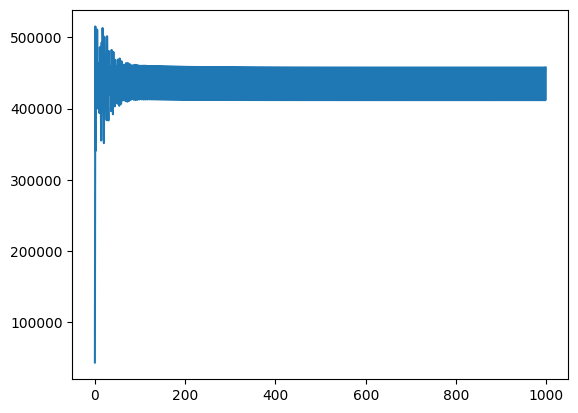

In [59]:
from torch import nn
nin = 100
nout = 75
nhid  = 50

W = torch.randn(nin,nout)
#Phi = nn.Parameter()
Phi = torch.randn((nhid,nhid), requires_grad=True)
#Phi = torch.tensor(torch.randn(nhid,nhid), requires_grad=True)
optimizer = torch.optim.SGD([Phi], lr=0.01, momentum=0.9)

Wa = random_projection((nin,nhid),normalize=True,bias=True,scale=5,gate=True)
Wb = random_projection((nhid,nout))


loss_acc = []
for i in range(1000):
    optimizer.zero_grad()
    # Wh =  Wa * Phi * Wb
    Wh = torch.matmul(Wa,torch.matmul(Phi,Wb))
    loss = torch.linalg.matrix_norm(W-Wh,'fro')
    loss.backward()
    optimizer.step()
    loss_acc.append(loss.item())

print(loss_acc)
plt.plot(loss_acc)

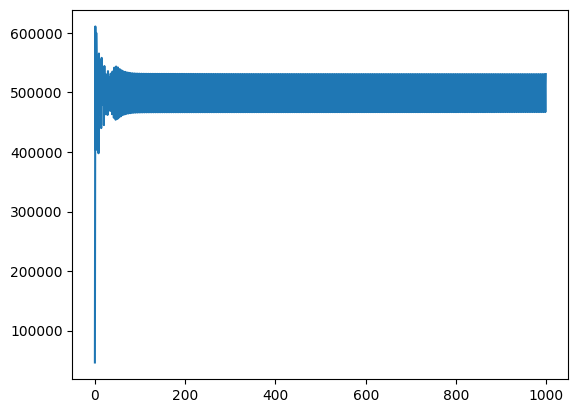